textbook- Recommender Systems by Jannach and Zanker

Fully developed and deployed RS are extremely comples and resource intensive

We'll show a simpler version of creating a recommendation system using item similarity for the project

Two most common types :
- Content Based: Produces recommendations based on the knowledge of users attitude to items, that is it uses the wisdom of the crowd to recommend items (amazon)
- Collaborative Filtering: Focus on the attributed of the items and give you recommendations based on the similarity between them (more comonly used, usually gives better results).Algorithm has ability to do feature learning on its own, whic means that it can start to learn for itself what features to use.

CF :
- Memory-Based Colllaborative Filtering
- Model-Based Collaborative filtering 


For our Python implemantation we will create a content based recommender system for data set of movies\
It's quite large, but in general, recommender systems in reallife usually deal with much larger data sets that the one will be working with

# Project

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

In [2]:
import numpy as np
import pandas as pd

In [8]:
columns_names=['user_id','item_id','rating','timestamp']

In [9]:
df=pd.read_csv('/Users/Taninka/Downloads/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/u.data',names=columns_names,sep='\t')

In [11]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [12]:
movie_titles=pd.read_csv('/Users/Taninka/Downloads/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/Movie_Id_Titles')

In [13]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
df=pd.merge(df,movie_titles, on='item_id')

In [16]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
sns.set_style('white')

In [22]:
#create a rating dataframe with average rating and numebr of ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head() #mean rating by title
#sort_value will sort them
#some of them may have jsut one rating, we need to check the count

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [24]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [27]:
#put everything in dataframe
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
ratings['num of ratings']=df.groupby('title')['rating'].count()

In [29]:
ratings.head() #index of dataframe is title of the film

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

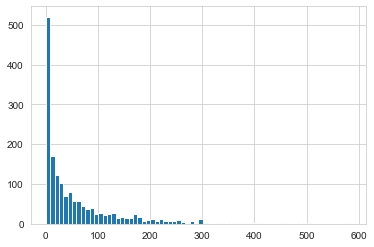

In [30]:
#plotting the histograms#re
ratings['num of ratings'].hist(bins=70) #most of the rating is auite few

<AxesSubplot:>

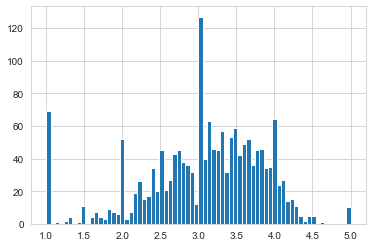

In [31]:
ratings['rating'].hist(bins=70)

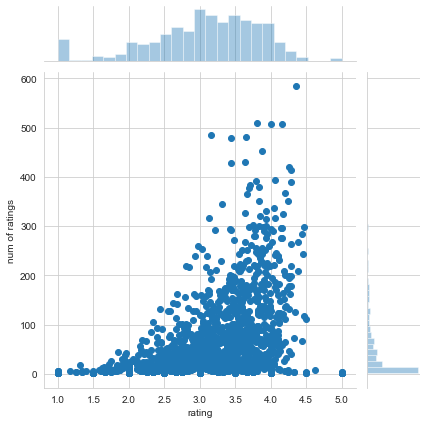

In [32]:
#realtionship btw average rating and number of ratings
sns.jointplot(x='rating',y='num of ratings', data=ratings)

In [34]:
#create matrix, user id on one axes and movie titles on the other axes, each cell consit of the rating the user gave to that movie
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [35]:
moviemat.head() #lot of missing values, make sense sinc emost of the people didn't see all of the films

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ratings.sort_values('num of ratings',ascending=False).head(10) #will choose two films, Star wars and Liar Liar and gra user rating for that two movies

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [52]:
starwars_user_ratings=moviemat['Star Wars (1977)']
liarliar_user_ratings=moviemat['Liar Liar (1997)']

In [53]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [54]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings) 
#compute pairwise correlation btw rows or columns of two DataFrame objects
#other movies and their correlation with star war movie


/Users/Taninka/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Taninka/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [55]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings)

In [56]:
#cleaning NULL values
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars #dataframe where index is title fo the movie and column is correlation column (hwo correlated are user rating for specific movie with the star wars movie)
#sorting by correlation we should get similarly ranked movies

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [57]:
corr_starwars.sort_values('Correlation',ascending=False) #some movies with perfect correlation =1
#thats probably becaouse those movies were seen just by one person who gave star wars movie 5 stars
#we cna fix it by sorting out movies that has some number of ratings ( less that 100 for example)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [58]:
corr_starwars=corr_starwars.join(ratings['num of ratings']) #we can use join casue name of the movie is the index

In [59]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [60]:
#filter out movies with less that 100 ratings
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [61]:
#explore liar liar
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [62]:
corr_liarliar.head() #lot of null values

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [64]:
corr_liarliar.dropna(inplace=True)

In [65]:
 corr_liarliar=corr_liarliar.join(ratings['num of ratings'])

In [66]:
corr_liarliar.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [69]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False)
#wwe cna play with the filter value to see if we can get better recommendations

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
